# LoRaWAN parameters

In [1]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import colors as mcolors

font = {'family' : 'serif',
        'size'   : 18}

matplotlib.rc('font', **font)

save = 0

In [2]:
data = pd.read_csv('exp4.dat', sep=' ')

0.0297277841051x+0.0350370168031


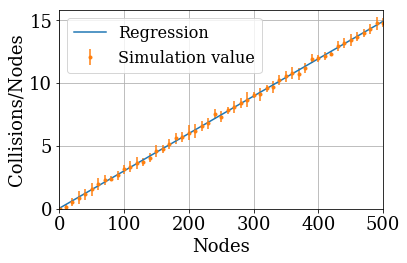

In [3]:
means = data.groupby(["nrNodes"], as_index=False).mean()
stds = data.groupby(["nrNodes"]).std()

nodesList = np.array(means.nrNodes)
normalizedCollisions = means.nrCollisions/nodesList
a,b = np.polyfit(nodesList,normalizedCollisions, 1)
print("{}x+{}".format(a,b))
plt.errorbar(nodesList, np.polyval((a,b), nodesList))

plt.errorbar(nodesList,normalizedCollisions, yerr=stds.nrCollisions/nodesList, fmt= '.')
plt.grid('on')
plt.xlabel('Nodes')
plt.ylabel('Collisions/Nodes')
plt.xlim([0,500])
plt.ylim([normalizedCollisions.min(), normalizedCollisions.max()+1])
plt.legend(["Regression", "Simulation value"], prop={'size': 16})
plt.tight_layout()

if save:
    print('Saving image...'),
    plt.savefig('collisions.pdf', format='pdf')
    print('done.')

In [4]:
means.keys()

Index([u'nrNodes', u'nrCollisions', u'nrTransmissions', u'OverallEnergy',
       u'nrReceived', u'nrProcessed', u'timeToFly'],
      dtype='object')

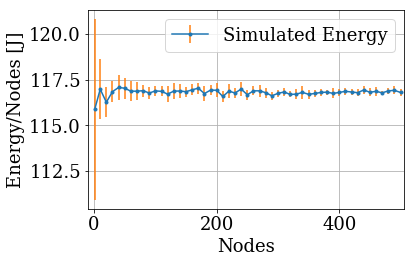

In [5]:
normalizedEnergy = means.OverallEnergy/nodesList
plt.errorbar(nodesList,normalizedEnergy, yerr=stds.OverallEnergy/nodesList, fmt= '.-', ecolor='C1')
plt.grid('on')
plt.xlabel('Nodes')
plt.ylabel('Energy/Nodes [J]')
plt.legend(['Simulated Energy'])
plt.xlim([-10,505])
plt.tight_layout()

if save:
    print('Saving image...'),
    plt.savefig('energy.pdf', format='pdf')
    print('done.')

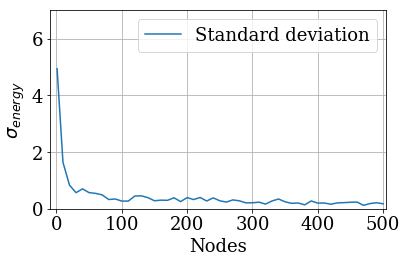

In [6]:
plt.plot(stds.OverallEnergy/nodesList)
plt.grid('on')
plt.xlabel('Nodes')
plt.ylabel('$\sigma_{energy}$')
plt.xlim([-10,505])
plt.ylim([0,7])
plt.legend(['Standard deviation'])
plt.tight_layout()
if save:
    print('Saving image...'),
    plt.savefig('energy-std.pdf', format='pdf')
    print('done.')

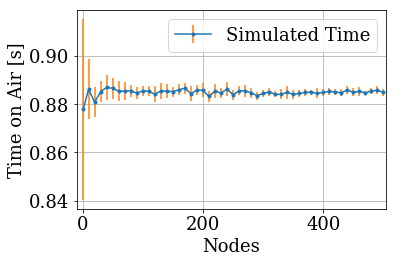

In [7]:
normalizedTime = means.timeToFly/nodesList
plt.errorbar(nodesList,normalizedTime/1e6, yerr=stds.timeToFly/(nodesList*1e6), fmt= '.-', ecolor='C1')
plt.grid('on')
plt.xlabel('Nodes')
plt.ylabel('Time on Air [s]')
plt.legend(['Simulated Time'])
plt.xlim([-10,505])
plt.tight_layout()

if save:
    print('Saving image...'),
    plt.savefig('timetofly.pdf', format='pdf')
    print('done.')

# Spread Factor and Coding Rate Analysis

In [8]:
data2 = pd.read_csv('expTimeOnAir.dat', sep=' ')
data2

,nrNodes,SF,CR,nrCollisions,nrTransmissions,OverallEnergy,nrReceived,nrProcessed,timeToFly
0,70,7,1,2,46979,350.840675,32910,32912,2.657884e+06
1,70,8,1,8,47367,643.451517,32285,32293,4.874633e+06
2,70,9,1,10,46780,1144.491786,37005,37015,8.670392e+06
3,70,10,1,20,47237,2311.344955,37991,38011,1.751019e+07
4,70,11,1,54,47107,4609.967899,39910,39964,3.492400e+07
5,70,12,1,74,46871,8160.071614,37586,37660,6.181872e+07
6,70,7,2,4,47406,398.883944,32455,32459,3.021848e+06
7,70,8,2,4,46880,712.876032,31629,31633,5.400576e+06
8,70,9,2,40,47309,1285.327245,37912,37952,9.737328e+06
9,70,10,2,24,47035,2555.766006,39117,39141,1.936186e+07


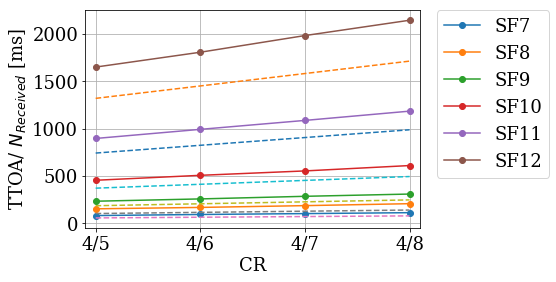

In [17]:
means2 = data2.groupby(["SF", "CR"], as_index=False).mean()
stds2 = data2.groupby(["SF", "CR"], as_index=False).std()

curveSim = np.zeros((6,4))
curveTeo = np.zeros((6,4))
for index, row in means2.iterrows():
    if row['SF'] == 7:
        curveSim[0,int(row['CR']-1)] = row.timeToFly/row.nrReceived
        curveTeo[0,int(row['CR']-1)] = row.timeToFly/row.nrTransmissions
    if row['SF'] == 8:
        curveSim[1,int(row['CR']-1)] = row.timeToFly/row.nrReceived
        curveTeo[1,int(row['CR']-1)] = row.timeToFly/row.nrTransmissions
    if row['SF'] == 9:
        curveSim[2,int(row['CR']-1)] = row.timeToFly/row.nrReceived
        curveTeo[2,int(row['CR']-1)] = row.timeToFly/row.nrTransmissions
    if row['SF'] == 10:
        curveSim[3,int(row['CR']-1)] = row.timeToFly/row.nrReceived
        curveTeo[3,int(row['CR']-1)] = row.timeToFly/row.nrTransmissions
    if row['SF'] == 11:
        curveSim[4,int(row['CR']-1)] = row.timeToFly/row.nrReceived
        curveTeo[4,int(row['CR']-1)] = row.timeToFly/row.nrTransmissions
    if row['SF'] == 12:
        curveSim[5,int(row['CR']-1)] = row.timeToFly/row.nrReceived
        curveTeo[5,int(row['CR']-1)] = row.timeToFly/row.nrTransmissions

labels = ['4/5', '4/6', '4/7', '4/8']

plt.plot(curveSim.T, 'o-')
plt.plot(curveTeo.T, '--')

plt.grid('on')
plt.xlabel('CR')
plt.xticks([0,1,2,3,4], labels)
plt.xlim([-0.1,3.1])
plt.ylabel('TTOA/ $N_{Received}$ [ms]')
plt.legend(['SF7', 'SF8', 'SF9', 'SF10', 'SF11', 'SF12'], bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

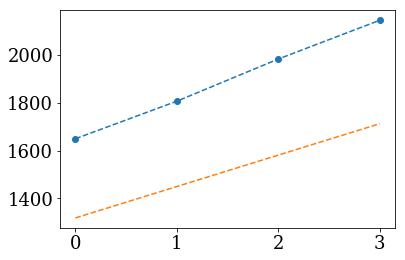

In [10]:
plt.plot(curveSim.T[:,5], 'o--')
plt.plot(curveTeo.T[:,5], '--')

In [11]:
means2.timeToFly/means2.nrTransmissions

0       56.576
1       63.744
2       70.912
3       78.080
4      102.912
5      115.200
6      127.488
7      139.776
8      185.344
9      205.824
10     226.304
11     246.784
12     370.688
13     411.648
14     452.608
15     493.568
16     741.376
17     823.296
18     905.216
19     987.136
20    1318.912
21    1449.984
22    1581.056
23    1712.128
dtype: float64

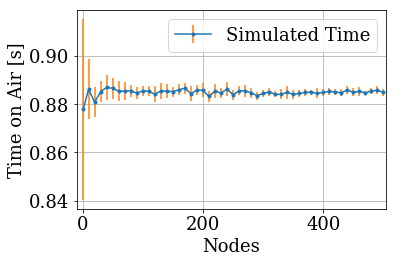

In [12]:
plt.errorbar(nodesList,normalizedTime/1e6, yerr=stds.timeToFly/(nodesList*1e6), fmt= '.-', ecolor='C1')
plt.grid('on')
plt.xlabel('Nodes')
plt.ylabel('Time on Air [s]')
plt.legend(['Simulated Time'])
plt.xlim([-10,505])
plt.tight_layout()

if save:
    print('Saving image...'),
    plt.savefig('timetofly.pdf', format='pdf')
    print('done.')